In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
import io

import imghdr
import os

print(tf.__version__)

2.2.0-rc2


In [0]:
tf.executing_eagerly()

True

# Using Drive Mounting Instead (Tutorial: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

To mount Google Drive:
- Run the code below
- Click the URL 
- Sign in & click Allow to get the authorization code
- Copy the authorization code and paste it to:
  Enter your authorization code: 
  ____________

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


After mounting, Collab will be connected to your Google Drive
Click the File button on the left <-, click 'drive' then 'My Drive', what we need is:
- sample_labels.csv file and the ct_scan_img.zip
- If it is not there, you can copy it from the Bangkit Group Project Folder
- Bangkit Group Project (Assig #5)/DATASET/CT_SCAN/ct_scan_img.zip"

Getting the sample_labels.csv in Colab:
- Find the sample_labels.csv file in your drive folder, right-click, and click COPY PATH
- Change the path variable below with the path you copied

In [0]:
path = "/content/drive/My Drive/Bangkit Group Project (Assig #5)/DATASET/CT_SCAN/sample_labels.csv"
sample_labels = pd.read_csv(path)

In [5]:
sample_labels.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


Data Distribution

In [0]:
sample_labels[:100].groupby('Finding Labels').count()[['Image Index']]

,Image Index
Finding Labels,
Atelectasis,3
Atelectasis|Infiltration|Mass|Pleural_Thickening,1
Cardiomegaly|Consolidation,3
Cardiomegaly|Edema|Effusion,1
Cardiomegaly|Emphysema,2
Consolidation,2
Consolidation|Effusion|Infiltration,1
Consolidation|Effusion|Infiltration|Nodule,1
Consolidation|Fibrosis,1


Getting the CT Scan Images to Colab:
- Find the ct_scan_img.zip file in your drive folder (in Colab)
- Right-click, then click COPY PATH
- Paste the change the path I have, which is: "/content/drive/My Drive/Bangkit Group Project (Assig #5)/DATASET/CT_SCAN/ct_scan_img.zip" BELOW, with the one you have.
- And then run the !unzip to unzip the images

In [0]:
!unzip -uq "/content/drive/My Drive/Bangkit Group Project (Assig #5)/DATASET/CT_SCAN/ct_scan_img.zip"

From the Sample Labels dataframe / table, we get the labels for each image, and make a list called 'labels'. Since we only use the first 100 images, we only take the first 100 labels.

Only take 1 finding for each label

In [0]:
labels = sample_labels['Finding Labels'][:100].tolist()

In [0]:
priority_finding = ["Pleural_Thickening", "Effusion", "Consolidation", "Hernia", "Pneumonia", "Fibrosis", "Edema", "Emphysema", "Cardiomegaly", "Pneumothorax", "Mass", "Nodule", "Atelectasis", "Infiltration", "No Finding"]
labels_2 = sample_labels["Finding Labels"][:100].tolist()
print(labels_2)

for n, findings in enumerate(labels_2):
    for f in priority_finding:
        if findings.find(f) != -1:
           labels_2[n] = f
           break
print(labels_2)

sample_labels['Finding Labels'][:100].replace([0:])

['Emphysema|Infiltration|Pleural_Thickening|Pneumothorax', 'Cardiomegaly|Emphysema', 'No Finding', 'Atelectasis', 'Cardiomegaly|Edema|Effusion', 'Consolidation|Mass', 'No Finding', 'No Finding', 'Effusion', 'No Finding', 'Consolidation|Effusion|Infiltration|Nodule', 'Mass', 'No Finding', 'No Finding', 'Effusion', 'Effusion', 'Effusion', 'No Finding', 'Mass|Pneumothorax', 'Cardiomegaly|Consolidation', 'Consolidation', 'Cardiomegaly|Consolidation', 'Cardiomegaly|Consolidation', 'Pneumothorax', 'No Finding', 'Effusion', 'Consolidation|Pleural_Thickening', 'Infiltration|Nodule', 'No Finding', 'Atelectasis', 'Atelectasis', 'Fibrosis', 'Infiltration', 'Infiltration', 'No Finding', 'No Finding', 'No Finding', 'No Finding', 'Fibrosis', 'No Finding', 'Consolidation', 'Emphysema', 'No Finding', 'No Finding', 'Infiltration', 'Consolidation|Mass', 'No Finding', 'Atelectasis|Infiltration|Mass|Pleural_Thickening', 'Infiltration', 'No Finding', 'No Finding', 'Infiltration', 'No Finding', 'No Finding'

From the Sample Labels dataframe / table, we get the filename of the images, and make a list out of that called 'image_dir' list.

In [0]:
image_dir = sample_labels['Image Index'].tolist()

In [0]:
# Just checking, carry on~
sample_labels[sample_labels['Image Index'] == image_dir[0]]['Finding Labels']

0    Emphysema|Infiltration|Pleural_Thickening|Pneu...
Name: Finding Labels, dtype: object

In [0]:
type(image_dir[0])

str

In [0]:
image_dir[:5]

['00000013_005.png',
 '00000013_026.png',
 '00000017_001.png',
 '00000030_001.png',
 '00000032_001.png']

The RAM available in Google Colab is LIMITED, I believe initially it gives 15 GB.
If there is an error of: Colab doesn't have enough RAM, usually it asks if we want MORE RAM, click yes!
And it will give us 35 GB.

But, it still won't be enough for us to try with ALL of the images.
Therefore, we will only use 100 Images.

In [0]:
test_dir = image_dir[:100] # Taking the first 100 Images

In [0]:
test_dir[:5]

['00000013_005.png',
 '00000013_026.png',
 '00000017_001.png',
 '00000030_001.png',
 '00000032_001.png']

# Creating the Tensor Dataset Object

Read more on: [TensorFlow Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)

The tf.data.Dataset API supports writing descriptive and efficient input pipelines. Dataset usage follows a common pattern:

- Create a source dataset from your input data.
- Apply dataset transformations to preprocess the data.
- Iterate over the dataset and process the elements.

Iteration happens in a streaming fashion, so the full dataset does not need to fit into memory.

Sources can be from:
- LIST, using -> from_tensor_slices
- Files given filename, using -> list_files

In [0]:
dataset_from_list = tf.data.Dataset.list_files(test_dir)

In [0]:
dataset_from_list

<ShuffleDataset shapes: (), types: tf.string>

In [0]:
for element in dataset_from_list:
  print(element)

tf.Tensor(b'./00000468_015.png', shape=(), dtype=string)
tf.Tensor(b'./00000524_001.png', shape=(), dtype=string)
tf.Tensor(b'./00000422_005.png', shape=(), dtype=string)
tf.Tensor(b'./00000443_000.png', shape=(), dtype=string)
tf.Tensor(b'./00000154_001.png', shape=(), dtype=string)
tf.Tensor(b'./00000362_001.png', shape=(), dtype=string)
tf.Tensor(b'./00000099_003.png', shape=(), dtype=string)
tf.Tensor(b'./00000491_004.png', shape=(), dtype=string)
tf.Tensor(b'./00000181_017.png', shape=(), dtype=string)
tf.Tensor(b'./00000175_002.png', shape=(), dtype=string)
tf.Tensor(b'./00000013_005.png', shape=(), dtype=string)
tf.Tensor(b'./00000490_000.png', shape=(), dtype=string)
tf.Tensor(b'./00000103_001.png', shape=(), dtype=string)
tf.Tensor(b'./00000042_002.png', shape=(), dtype=string)
tf.Tensor(b'./00000269_001.png', shape=(), dtype=string)
tf.Tensor(b'./00000251_000.png', shape=(), dtype=string)
tf.Tensor(b'./00000545_000.png', shape=(), dtype=string)
tf.Tensor(b'./00000545_004.png'

## *** Task 1: Create Dataset using function -> from_tensor_slices() See LINK***

In [0]:
dataset_of_filenames = tf.data.Dataset.from_tensor_slices(test_dir)

In [0]:
dataset_of_filenames

<TensorSliceDataset shapes: (), types: tf.string>

In [0]:
for element in dataset_of_filenames:
  print(element)

tf.Tensor(b'00000013_005.png', shape=(), dtype=string)
tf.Tensor(b'00000013_026.png', shape=(), dtype=string)
tf.Tensor(b'00000017_001.png', shape=(), dtype=string)
tf.Tensor(b'00000030_001.png', shape=(), dtype=string)
tf.Tensor(b'00000032_001.png', shape=(), dtype=string)
tf.Tensor(b'00000040_003.png', shape=(), dtype=string)
tf.Tensor(b'00000042_002.png', shape=(), dtype=string)
tf.Tensor(b'00000057_001.png', shape=(), dtype=string)
tf.Tensor(b'00000061_002.png', shape=(), dtype=string)
tf.Tensor(b'00000061_019.png', shape=(), dtype=string)
tf.Tensor(b'00000061_025.png', shape=(), dtype=string)
tf.Tensor(b'00000079_000.png', shape=(), dtype=string)
tf.Tensor(b'00000080_005.png', shape=(), dtype=string)
tf.Tensor(b'00000083_000.png', shape=(), dtype=string)
tf.Tensor(b'00000084_000.png', shape=(), dtype=string)
tf.Tensor(b'00000096_006.png', shape=(), dtype=string)
tf.Tensor(b'00000099_003.png', shape=(), dtype=string)
tf.Tensor(b'00000099_006.png', shape=(), dtype=string)
tf.Tensor(

As we can see, whether it is made using list_files or from_tensor_slices it outputs the same dataset. 

In [0]:
for f in dataset_of_filenames.take(1):
    print(f.numpy())
    print(f)
    print(type(f))
    filename_str = str(f.numpy())[2:-1]
    print(filename_str)
    print(type(filename_str))
    print(type(str(f.numpy())))
    print(image_dir[0])
    print(filename_str == image_dir[0])
    print(sample_labels[sample_labels['Image Index'] == filename_str].reset_index().iloc[0]['Finding Labels'])


b'00000013_005.png'
tf.Tensor(b'00000013_005.png', shape=(), dtype=string)
<class 'tensorflow.python.framework.ops.EagerTensor'>
00000013_005.png
<class 'str'>
<class 'str'>
00000013_005.png
True
Emphysema|Infiltration|Pleural_Thickening|Pneumothorax


In [0]:
def parse_data_without_augmentation(filename, IMAGE_SIZE): #, scores, IMAGE_SIZE):
    '''
    Loads the image file without any augmentation. Used for validation set.
    Args:
        filename: the filename from the record
        scores: the scores from the record
    Returns:
        an image referred to by the filename and its scores
    '''

    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    image = (tf.cast(image, tf.float32) - 127.5) / 127.5

    return image #, label #, scores
    
""""
    print("FILENAME")
  
    print(str(filename))
    print(tf.strings.as_string(filename))
    tf.compat.v1.enable_eager_execution()
    filename_str = str(filename.numpy())[2:-1]
    # sample_labels['Finding Labels'].tolist()
    label = sample_labels[sample_labels['Image Index'] == filename_str].reset_index().iloc[0]['Finding Labels']
    #sample_labels[sample_labels['Image Index'] == str(filename)]['Finding Labels']
    print(label)

"""""


'"\n    print("FILENAME")\n  \n    print(str(filename))\n    print(tf.strings.as_string(filename))\n    tf.compat.v1.enable_eager_execution()\n    filename_str = str(filename.numpy())[2:-1]\n    # sample_labels[\'Finding Labels\'].tolist()\n    label = sample_labels[sample_labels[\'Image Index\'] == filename_str].reset_index().iloc[0][\'Finding Labels\']\n    #sample_labels[sample_labels[\'Image Index\'] == str(filename)][\'Finding Labels\']\n    print(label)\n\n'

In [0]:
IMG_WIDTH = 160
IMG_HEIGHT = 160
IMG_SIZE = 160
IMAGE_SIZE = 160
SHUFFLE_BUFFER_SIZE = 1000
BATCH_SIZE = 25 #1 #####32
print("BATCH SIZE: "+str(BATCH_SIZE))
IMG_HEIGHT = 160 #224
IMG_WIDTH = 160 #224
IMG_SIZE = 160
image_count = len(test_dir)
print(image_count)
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
print(STEPS_PER_EPOCH)
AUTOTUNE = tf.data.experimental.AUTOTUNE

BATCH SIZE: 25
100
4.0


To actually get the Image, we need to parse every bit of the image from the image file, using the function:
parse_data_without_augmentation on the Dataset of filename we have -> list_ds.

num_parallel_calls: (Optional.) If specified, the implementation creates a threadpool, which is used to fetch inputs from cycle elements asynchronously and in parallel. The default behavior is to fetch inputs from cycle elements synchronously with no parallelism. If the value tf.data.experimental.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.

In [0]:
image_dataset = dataset_of_filenames.map(lambda x: parse_data_without_augmentation(x, IMAGE_SIZE), num_parallel_calls=AUTOTUNE)

In [0]:
image_dataset

<ParallelMapDataset shapes: (160, 160, 3), types: tf.float32>

Some things we can do to Dataset object:
- Apply transformation
- Concatenate
- Enumerate (Create tuples of (index, element) with specified index starting point)
- Filter


Since we cannot index a TF Dataset object, we can turn the Dataset into List form using the code below

In [0]:
img_ds_list = list(image_dataset.as_numpy_iterator())

In [0]:
img_ds_list[0]

array([[[-0.3459608 , -0.3459608 , -0.3459608 ],
        [-0.35529408, -0.35529408, -0.35529408],
        [-0.3635294 , -0.3635294 , -0.3635294 ],
        ...,
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.9607843 , -0.9607843 , -0.9607843 ]],

       [[ 0.2970197 ,  0.2970197 ,  0.2970197 ],
        [ 0.29427442,  0.29427442,  0.29427442],
        [ 0.29568624,  0.29568624,  0.29568624],
        ...,
        [-0.9650981 , -0.9650981 , -0.9650981 ],
        [-0.9671374 , -0.9671374 , -0.9671374 ],
        [-0.9607843 , -0.9607843 , -0.9607843 ]],

       [[ 0.36549026,  0.36549026,  0.36549026],
        [ 0.35803917,  0.35803917,  0.35803917],
        [ 0.35686275,  0.35686275,  0.35686275],
        ...,
        [-0.96862745, -0.96862745, -0.96862745],
        [-0.96509796, -0.96509796, -0.96509796],
        [-0.9607843 , -0.9607843 , -0.9607843 ]],

       ...,

       [[-0.01607846, -0.01607846, -0.01607846],
        [ 0

In [0]:
# The Images
for image in image_dataset:
  print(image)

Streaming output truncated to the last 5000 lines.
[[[-0.3459608  -0.3459608  -0.3459608 ]
  [-0.35529408 -0.35529408 -0.35529408]
  [-0.3635294  -0.3635294  -0.3635294 ]
  ...
  [-0.9607843  -0.9607843  -0.9607843 ]
  [-0.9607843  -0.9607843  -0.9607843 ]
  [-0.9607843  -0.9607843  -0.9607843 ]]

 [[ 0.2970197   0.2970197   0.2970197 ]
  [ 0.29427442  0.29427442  0.29427442]
  [ 0.29568624  0.29568624  0.29568624]
  ...
  [-0.9650981  -0.9650981  -0.9650981 ]
  [-0.9671374  -0.9671374  -0.9671374 ]
  [-0.9607843  -0.9607843  -0.9607843 ]]

 [[ 0.36549026  0.36549026  0.36549026]
  [ 0.35803917  0.35803917  0.35803917]
  [ 0.35686275  0.35686275  0.35686275]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96509796 -0.96509796 -0.96509796]
  [-0.9607843  -0.9607843  -0.9607843 ]]

 ...

 [[-0.01607846 -0.01607846 -0.01607846]
  [ 0.1392157   0.1392157   0.1392157 ]
  [ 0.30392158  0.30392158  0.30392158]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.95490146 -0.95490146 -0.954

Splitting Dataset into Training, Testing & Validation 

In [0]:
# Note that we only have 100 images
train_size = 70
test_size = 15
val_size = 15

In [0]:
# Splitting Image Data
train_img = image_dataset.take(train_size)
test_img = image_dataset.skip(train_size)
val_img = test_img.skip(val_size)
test_img = test_img.take(test_size)

In [0]:
train_img

<TakeDataset shapes: (160, 160, 3), types: tf.float32>

In [0]:
train_lab = labels_2[0:train_size]
print(len(train_lab))
test_lab = labels_2[train_size:(train_size+test_size)]
print(len(test_lab))
val_lab = labels_2[(train_size+test_size):]
print(len(val_lab))

70
15
15


In [0]:
for img in train_img:
  print(img)

tf.Tensor(
[[[-0.3459608  -0.3459608  -0.3459608 ]
  [-0.35529408 -0.35529408 -0.35529408]
  [-0.3635294  -0.3635294  -0.3635294 ]
  ...
  [-0.9607843  -0.9607843  -0.9607843 ]
  [-0.9607843  -0.9607843  -0.9607843 ]
  [-0.9607843  -0.9607843  -0.9607843 ]]

 [[ 0.2970197   0.2970197   0.2970197 ]
  [ 0.29427442  0.29427442  0.29427442]
  [ 0.29568624  0.29568624  0.29568624]
  ...
  [-0.9650981  -0.9650981  -0.9650981 ]
  [-0.9671374  -0.9671374  -0.9671374 ]
  [-0.9607843  -0.9607843  -0.9607843 ]]

 [[ 0.36549026  0.36549026  0.36549026]
  [ 0.35803917  0.35803917  0.35803917]
  [ 0.35686275  0.35686275  0.35686275]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96509796 -0.96509796 -0.96509796]
  [-0.9607843  -0.9607843  -0.9607843 ]]

 ...

 [[-0.01607846 -0.01607846 -0.01607846]
  [ 0.1392157   0.1392157   0.1392157 ]
  [ 0.30392158  0.30392158  0.30392158]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.95490146 -0.95490146 -0.95490146]
  [-0.71333176 -0.71333176 -0.713

In [0]:
def show_batch(image_batch, num_elements): #, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(num_elements):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

In [0]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  #ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  #ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [0]:
BATCH_SIZE = train_size
print("Train size: "+str(BATCH_SIZE))
train_img_batch = prepare_for_training(train_img)
BATCH_SIZE = test_size
print("Test size: "+str(BATCH_SIZE))
test_img_batch = prepare_for_training(test_img)
BATCH_SIZE = val_size
print("Val size: "+str(BATCH_SIZE))
val_img_batch = prepare_for_training(val_img)

Train size: 70
Test size: 15
Val size: 15


In [0]:
#for img in train_img:
#  print(img)

In [0]:
#for img in train_img_batch:
#  print(img)

In [0]:
train_img_batch

<PrefetchDataset shapes: (None, 160, 160, 3), types: tf.float32>

In [0]:
train_batch = next(iter(train_img_batch))
test_batch = next(iter(test_img_batch))
val_batch = next(iter(val_img_batch))

In [0]:
print(train_batch.shape)
print(test_batch.shape)
print(val_batch.shape)

(70, 160, 160, 3)
(15, 160, 160, 3)
(15, 160, 160, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

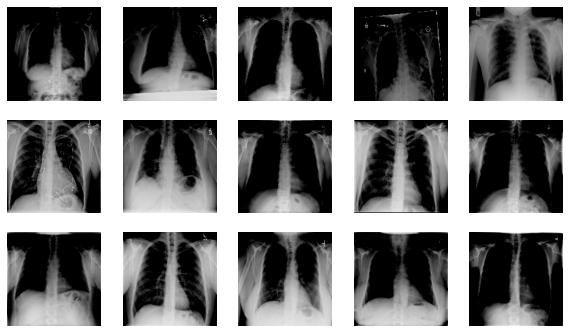

In [0]:
show_batch(val_batch.numpy(), val_size)

## Feature Extraction Using Pre-trained MobileNetV2 Model

Often, it is better to get features using a pre-trained embedding model that have been trained with millions of images, instead of training our own embedding. We will use MobileNetV2.

In [0]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [0]:
print(IMG_SIZE)

160


In [0]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet'
                                               )

9412608/9406464 [==============================] - 0s 0us/step


Extracting features for train, test, and validation.

In [0]:
train_features = base_model(train_batch)
test_features = base_model(test_batch)
val_features = base_model(val_batch)

In [0]:
train_features.shape

TensorShape([70, 5, 5, 1280])

We need to convert the numpy version of these features, to Input Tensors, before inputting it to the model.

In [0]:
# fnp = features numpy
train_fnp = train_features.numpy()
test_fnp = test_features.numpy()
val_fnp = val_features.numpy()

In [0]:
train_input = tf.convert_to_tensor(train_fnp, dtype=tf.float32)
test_input = tf.convert_to_tensor(test_fnp, dtype=tf.float32)
val_input = tf.convert_to_tensor(val_fnp, dtype=tf.float32)

In [0]:
test_input.shape

TensorShape([15, 5, 5, 1280])

Another Way:

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [0]:
train_batch_ave = global_average_layer(train_features)
print(train_batch_ave.shape)

(70, 1280)


In [0]:
test_batch_ave = global_average_layer(test_features)
print(test_batch_ave.shape)

(15, 1280)


In [0]:
val_batch_ave = global_average_layer(val_features)
print(val_batch_ave.shape)

(15, 1280)


In [0]:
prediction_layer = tf.keras.layers.Dense(256) #(2) #256

In [0]:
train_pred_batch = prediction_layer(train_batch_ave)
print(train_pred_batch.shape)

(70, 256)


In [0]:
test_pred_batch = prediction_layer(test_batch_ave)
print(test_pred_batch.shape)

(15, 256)


In [0]:
val_pred_batch = prediction_layer(val_batch_ave)
print(val_pred_batch.shape)

(15, 256)


In [0]:
train_input = train_pred_batch.numpy()

In [0]:
train_input.shape

(70, 256)

In [0]:
test_input = test_pred_batch.numpy()
test_input.shape

(15, 256)

In [0]:
val_input = val_pred_batch.numpy()
val_input.shape

(15, 256)

Pre-processing the Labels:

Since the labels are texts, we need to create an embedding or number / vector representations from it. 

We will use:
- LabelEncoder -> assigning integer 0 to number of unique categorical variable to each categorical variable. 
- OneHotEncoding

In [0]:
num_of_labels = len(labels)
print(num_of_labels)              

100


In [0]:
unique_labels = sample_labels['Finding Labels'][:100].unique().tolist()
num_of_unique = len(unique_labels)
num_of_unique

AttributeError: ignored

In [0]:
labels_2[:5]

['Emphysema|Infiltration|Pleural_Thickening|Pneumothorax',
 'Cardiomegaly|Emphysema',
 'No Finding',
 'Atelectasis',
 'Cardiomegaly|Edema|Effusion']

## **Task 2: Create Label Encoder + Learn about One Hot Encoding**

Read here: [Scikit-Learn Preprocessing](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [0]:
from sklearn import preprocessing

In [0]:
# le is variable where you create the Label Encoder
le = preprocessing.LabelEncoder()

In [0]:
le.fit(labels)

LabelEncoder()

Encode train, test, and validation labels with Integer Values.

In [0]:
train_label_value = le.transform(train_lab)
test_label_value = le.transform(test_lab)
val_label_value = le.transform(val_lab)

In [0]:
label_to_value = pd.DataFrame(data=val_lab, columns=['Original Label'])
label_to_value['Label Value'] = val_label_value

In [0]:
all_labels_value = le.transform(labels)
len(all_labels_value)

100

Below is the Example of Encoding Validation Label to their label values. 

Notice that all 'No Finding' becomes the value 24

In [0]:
label_to_value

,Original Label,Label Value
0,No Finding,24
1,No Finding,24
2,Infiltration,20
3,Consolidation|Effusion|Infiltration,6
4,Consolidation|Fibrosis,8
5,No Finding,24
6,Fibrosis|Pleural_Thickening,19
7,No Finding,24
8,No Finding,24
9,No Finding,24


In [0]:
train_one_hot = tf.one_hot(train_label_value, num_of_unique, on_value=1, off_value=0)
test_one_hot = tf.one_hot(test_label_value, num_of_unique, on_value=1, off_value=0)
val_one_hot = tf.one_hot(val_label_value, num_of_unique, on_value=1, off_value=0)

In [0]:
all_labels_one_hot = tf.one_hot(all_labels_value, num_of_unique, on_value=1, off_value=0)

In [0]:
label_to_value['One Hot'] = val_one_hot

In [0]:
label_to_value

,Original Label,Label Value,One Hot
0,No Finding,24,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
1,No Finding,24,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
2,Infiltration,20,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
3,Consolidation|Effusion|Infiltration,6,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
4,Consolidation|Fibrosis,8,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
5,No Finding,24,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
6,Fibrosis|Pleural_Thickening,19,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
7,No Finding,24,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
8,No Finding,24,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
9,No Finding,24,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."


In [0]:
all_labels_df = pd.DataFrame(data=labels, columns=['Label'])
all_labels_df['Value'] = all_labels_value
all_labels_df['One Hot'] = all_labels_one_hot

In [0]:
all_labels_df

,Label,Value,One Hot
0,Emphysema|Infiltration|Pleural_Thickening|Pneu...,15,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
1,Cardiomegaly|Emphysema,4,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
2,No Finding,24,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
3,Atelectasis,0,"(tf.Tensor(1, shape=(), dtype=int32), tf.Tenso..."
4,Cardiomegaly|Edema|Effusion,3,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
...,...,...,...
95,Effusion|Infiltration,12,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
96,Fibrosis,18,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
97,No Finding,24,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."
98,No Finding,24,"(tf.Tensor(0, shape=(), dtype=int32), tf.Tenso..."


# Creating the CT Scan Image Classification Model

## **Task 3: Experiment & try to improve the model.**

The model seems to be OVERFITTING, read up on Neural Network & how to reduce overfitting in Neural Network, MLCC also have some programming exercises.

Read: [TensorFlow Layers Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers)

In [0]:
from tensorflow.keras.models import Sequential

Additional Metrics Functions on top of Accuracy

In [0]:
def recall_m(y_true, y_pred):
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+tf.keras.backend.epsilon()))

Creating the Model TRIAL #1:

In [0]:
model_1 = keras.Sequential([
    keras.Input(shape=(256)), 
    #(25, 5, 5, 1280)),
    #keras.layers.Flatten(input_shape=(5, 5)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),    
    #keras.layers.Dense(10)
    keras.layers.Dense(num_of_unique, activation='softmax')
])

In [0]:
model_1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_40 (Dense)             (None, 26)                3354      
Total params: 36,250
Trainable params: 36,250
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy', precision_m, recall_m, f1_m])

In [0]:
history = model_1.fit(train_input, train_one_hot, epochs=150, validation_data = (val_input, val_one_hot))

In [0]:
model_2 = keras.Sequential([
    keras.Input(shape=(256)),     
    keras.layers.Dense(500, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.45)),
    keras.layers.Dense(320, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.11)),     
    keras.layers.Dense(300,kernel_regularizer=tf.keras.regularizers.l2(0.07)),     
    keras.layers.Dropout(rate=0.001),
    keras.layers.Dense(180),    
    #keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.07)),                 

    keras.layers.Dense(num_of_unique, activation='softmax')
])

model_2.summary()

model_2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy', precision_m, recall_m, f1_m])

history = model_2.fit(train_input, train_one_hot, epochs=300, validation_data = (val_input, val_one_hot))

Model: "sequential_213"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_689 (Dense)            (None, 500)               128500    
_________________________________________________________________
dense_690 (Dense)            (None, 320)               160320    
_________________________________________________________________
dense_691 (Dense)            (None, 300)               96300     
_________________________________________________________________
dropout_89 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_692 (Dense)            (None, 180)               54180     
_________________________________________________________________
dense_693 (Dense)            (None, 26)                4706      
Total params: 444,006
Trainable params: 444,006
Non-trainable params: 0
______________________________________________

In [0]:
#model_1.fit(train_input, train_one_hot, epochs=10) #, validation_data = (val_input, val_one_hot))

In [0]:
#history = model_1.fit(train_input, train_one_hot, epochs=20, validation_data = (val_input, val_one_hot))

EVALUATION

In [0]:
evaluation = model_2.evaluate(test_input, test_one_hot)

1/1 [==============================] - 0s 3ms/step - loss: 3.1399 - accuracy: 0.5333 - precision_m: 0.6667 - recall_m: 0.5333 - f1_m: 0.5926


In [0]:
def create_evaluation_table(model, x_input, actual_label):
  test_pred = model_1.predict(x_input)
  argmarx_ = [np.argmax(pred) for pred in test_pred]
  pred_labels = [all_labels_df[all_labels_df.Value == val].reset_index().iloc[0]['Label'] for val in argmarx_]
  compare = pd.DataFrame(data=actual_label, columns=['Actual'])
  compare['Predicted'] = pred_labels
  return compare

In [0]:
test_eval_table = create_evaluation_table(model_2, test_input, test_lab)

In [0]:
test_eval_table

,Actual,Predicted
0,No Finding,No Finding
1,No Finding,No Finding
2,No Finding,No Finding
3,Cardiomegaly|Emphysema,No Finding
4,No Finding,No Finding
5,No Finding,No Finding
6,No Finding,No Finding
7,No Finding,No Finding
8,No Finding,No Finding
9,Infiltration,No Finding


In [0]:
val_eval = model_2.evaluate(val_input, val_one_hot)

1/1 [==============================] - 0s 1ms/step - loss: 3.5026 - accuracy: 0.6000 - precision_m: 0.5833 - recall_m: 0.4667 - f1_m: 0.5185


In [0]:
val_eval_table = create_evaluation_table(model_2, val_input, val_lab)

In [0]:
val_eval_table

,Actual,Predicted
0,No Finding,Effusion
1,No Finding,No Finding
2,Infiltration,No Finding
3,Consolidation|Effusion|Infiltration,No Finding
4,Consolidation|Fibrosis,No Finding
5,No Finding,No Finding
6,Fibrosis|Pleural_Thickening,No Finding
7,No Finding,No Finding
8,No Finding,No Finding
9,No Finding,No Finding


In [0]:
train_eval = model_2.evaluate(train_input, train_one_hot)

3/3 [==============================] - 0s 3ms/step - loss: 1.9101 - accuracy: 0.5143 - precision_m: 0.7181 - recall_m: 0.5139 - f1_m: 0.5936


In [0]:
train_eval_table = create_evaluation_table(model_2, train_input, train_lab)

In [0]:
train_eval_table

,Actual,Predicted
0,Emphysema|Infiltration|Pleural_Thickening|Pneu...,Emphysema|Infiltration|Pleural_Thickening|Pneu...
1,Cardiomegaly|Emphysema,Cardiomegaly|Emphysema
2,No Finding,No Finding
3,Atelectasis,Atelectasis
4,Cardiomegaly|Edema|Effusion,Cardiomegaly|Edema|Effusion
...,...,...
65,No Finding,No Finding
66,Pneumothorax,Pneumothorax
67,Emphysema|Mass,Emphysema|Mass
68,No Finding,No Finding
